# Import

In [1]:
from defdict import *
%matplotlib inline

In [2]:
def plot_dataset(x_data, y_data, y_pred=None):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
    for col in range(3):
        plt.sca(axes[col])
        if y_data.shape[-1]==1:
            plot_series(col, x_data, y_data, y_pred=y_pred,
                    y_label=("$x(t)$" if col==0 else None))
        else:
            plot_multiple_forecasts(col, x_valid, y_valid, y_pred, 
                    y_label=("$x(t)$" if col==0 else None))
    plt.show()

def plot_next_time(idx, x_data, y_data, y_pred=None):
    plt.plot(x_data[idx], color='k', linewidth=3)
    for i in range(4):
        n=i*12+3
        plt.plot(np.arange(n+1,n+11),y_data[idx][n], linewidth=3, alpha=1)
        if y_pred is not None:
            plt.plot(np.arange(n+1,n+11),y_pred[idx][n], linewidth=0.1, marker='X')
    

# 15.3 시계열 예측하기 (604p)

#### dataset

(7000, 50, 1) (2000, 50, 1) (1000, 50, 1)
(7000, 1) (2000, 1) (1000, 1)


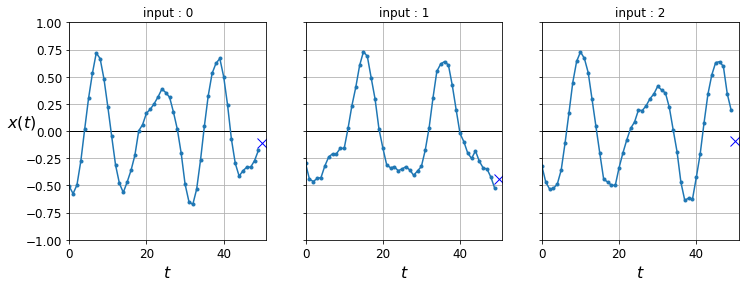

In [27]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

print(x_train.shape, x_valid.shape, x_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

plot_dataset(x_valid, y_valid)

## 15.3.1 기준 성능 (605p)

#### step 1. build model

In [55]:
model = models.Sequential([
    layers.Flatten(input_shape=[50, 1]),
    layers.Dense(1)
])
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


#### step 2. train model

Train on 7000 samples, validate on 2000 samples
Epoch 1/2
7000/7000 [==============================] - 0s 53us/sample - loss: 0.1951 - val_loss: 0.0594
Epoch 2/2
7000/7000 [==============================] - 0s 29us/sample - loss: 0.0403 - val_loss: 0.0291


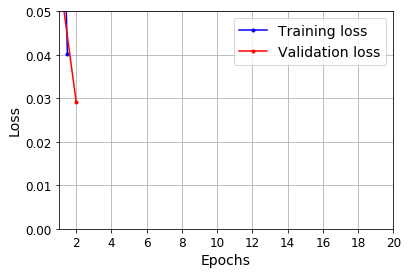

2000/2000 [==============================] - 0s 16us/sample - loss: 0.0291


0.02912338027358055

In [57]:
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_valid, y_valid))
plot_learning_curves(history.history["loss"], history.history["val_loss"])
model.evaluate(x_valid, y_valid)

#### step 3. use model

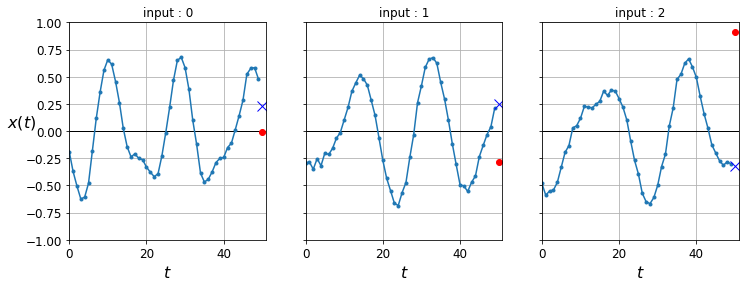

In [56]:
y_pred = model.predict(x_valid)
plot_dataset(x_valid, y_valid, y_pred)

## 15.3.2 간단한 RNN 구현하기 (606p)

#### step 1. build Model

In [58]:
model = models.Sequential([
    layers.SimpleRNN(1, input_shape=[None, 1])
])

model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_20 (SimpleRNN)    (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


#### step 2. train Model

Train on 7000 samples, validate on 2000 samples
Epoch 1/2
7000/7000 [==============================] - 2s 225us/sample - loss: 0.2532 - val_loss: 0.2324
Epoch 2/2
7000/7000 [==============================] - 2s 221us/sample - loss: 0.2163 - val_loss: 0.1925


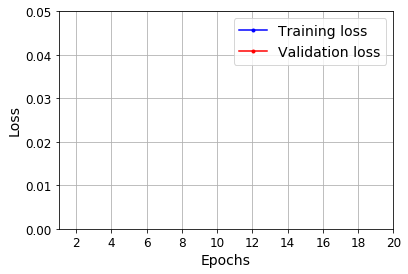

2000/2000 [==============================] - 0s 66us/sample - loss: 0.1925


0.19250110232830048

In [61]:
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_valid, y_valid))
plot_learning_curves(history.history["loss"], history.history["val_loss"])
model.evaluate(x_valid, y_valid)

#### step 3. use Model

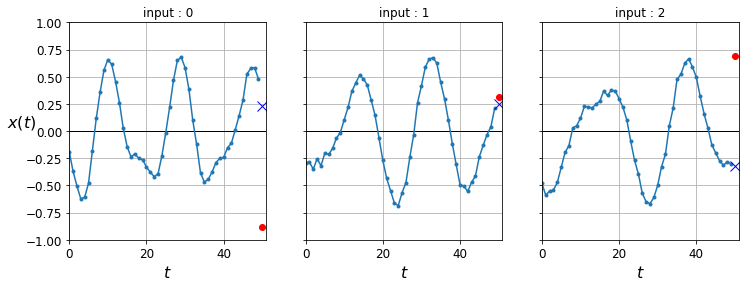

In [59]:
y_pred = model.predict(x_valid)

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(col, x_valid, y_valid, y_pred,
                y_label=("$x(t)$" if col==0 else None))
plt.show()

## 15.3.3 심층 RNN (608p)

#### step 1. build model

In [62]:
model = models.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.SimpleRNN(20, return_sequences=True),
    layers.SimpleRNN(1)
])
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_21 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_22 (SimpleRNN)    (None, None, 20)          820       
_________________________________________________________________
simple_rnn_23 (SimpleRNN)    (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


#### step 2. use model

Train on 7000 samples, validate on 2000 samples
Epoch 1/2
7000/7000 [==============================] - 6s 891us/sample - loss: 0.0278 - val_loss: 0.0091
Epoch 2/2
7000/7000 [==============================] - 5s 669us/sample - loss: 0.0079 - val_loss: 0.0069


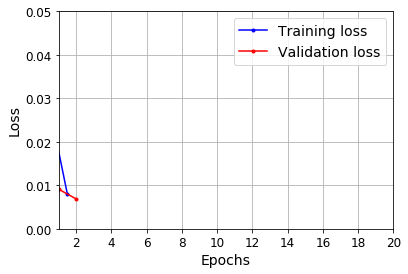

2000/2000 [==============================] - 0s 162us/sample - loss: 0.0069


0.006867916971445084

In [64]:
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_valid, y_valid))
plot_learning_curves(history.history["loss"], history.history["val_loss"])
model.evaluate(x_valid, y_valid)

#### step 3. use model

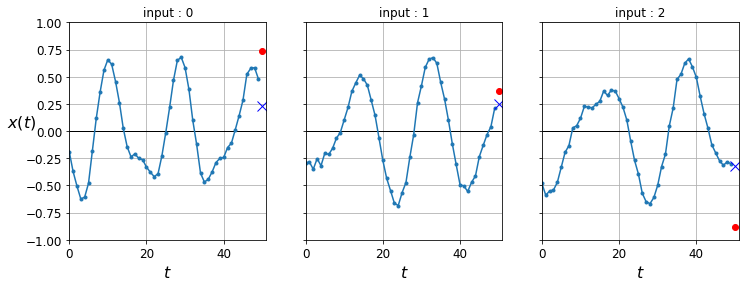

In [63]:
y_pred = model.predict(x_valid)
plot_dataset(x_valid, y_valid, y_pred)

## 15.3.4. 여러 타임 스텝 앞을 예측하기 (609p)

### 마지막 긴 길이의 타임스텝 예측하기 ( 610p )

#### dataset

(7000, 50, 1) (2000, 50, 1) (1000, 50, 1)
(7000, 10) (2000, 10) (1000, 10)


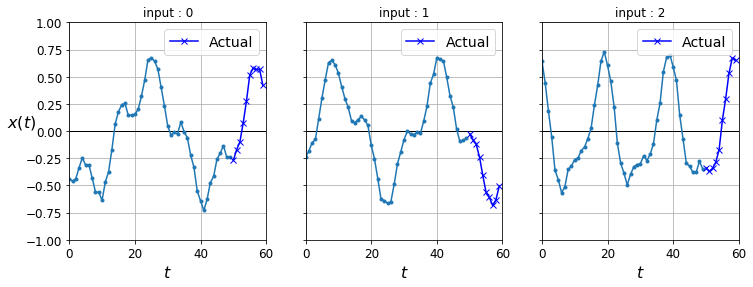

In [3]:
series = generate_time_series(10000, n_steps + 10)
x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

print(x_train.shape, x_valid.shape, x_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

plot_dataset(x_valid, y_valid)

#### step 1. build model

In [4]:
model = models.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.SimpleRNN(20),
    layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense (Dense)                (None, 10)                210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


#### step 2. train model

Train on 7000 samples, validate on 2000 samples
7000/7000 [==============================] - 5s 700us/sample - loss: 0.0613 - val_loss: 0.0311


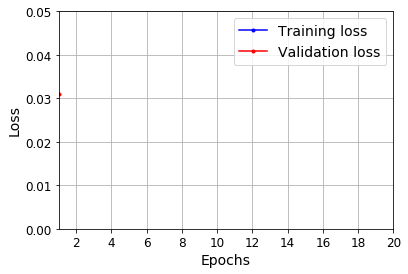

2000/2000 [==============================] - 0s 120us/sample - loss: 0.0311


0.031091144740581514

In [84]:
history = model.fit(x_train, y_train, epochs=1,
                    validation_data=(x_valid, y_valid))
plot_learning_curves(history.history["loss"], history.history["val_loss"])
model.evaluate(x_valid, y_valid)

#### step 3. use model

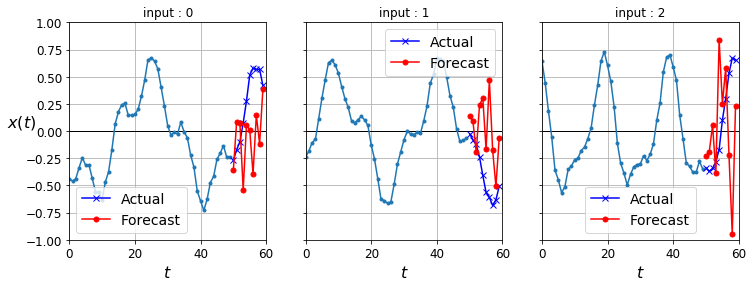

In [5]:
y_pred = model.predict(x_valid)
plot_dataset(x_valid, y_valid, y_pred)

### 여러 구간 긴 길이의 타임스텝 예측하기 ( 612p )

#### dataset

(7000, 50, 1) (2000, 50, 1) (1000, 50, 1)
(7000, 50, 10) (2000, 50, 10) (1000, 50, 10)


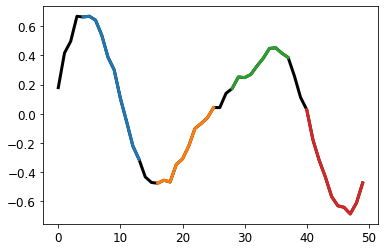

In [16]:
series = generate_time_series(10000, n_steps + 10)
x_train = series[:7000, :n_steps]
x_valid = series[7000:9000, :n_steps]
x_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
y_train = Y[:7000]
y_valid = Y[7000:9000]
y_test = Y[9000:]

print(x_train.shape, x_valid.shape, x_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

plot_next_time(0, x_valid, y_valid)

#### step 1. build model

In [17]:
model = models.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.SimpleRNN(20, return_sequences=True),
    layers.TimeDistributed(layers.Dense(10))
])

def last_time_step_mse(y_true, y_pred):
    return tf.keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])

#### step 2. train model 

Train on 7000 samples, validate on 2000 samples
Epoch 1/2
7000/7000 [==============================] - 5s 714us/sample - loss: 0.0477 - last_time_step_mse: 0.0371 - val_loss: 0.0358 - val_last_time_step_mse: 0.0243
Epoch 2/2
7000/7000 [==============================] - 4s 586us/sample - loss: 0.0364 - last_time_step_mse: 0.0252 - val_loss: 0.0336 - val_last_time_step_mse: 0.0217


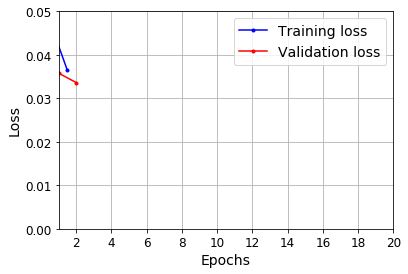

2000/2000 [==============================] - 0s 122us/sample - loss: 0.0336 - last_time_step_mse: 0.0217


[0.033626313745975495, 0.02172479]

In [18]:
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_valid, y_valid))
plot_learning_curves(history.history["loss"], history.history["val_loss"])
model.evaluate(x_valid, y_valid)

#### step 3. use model

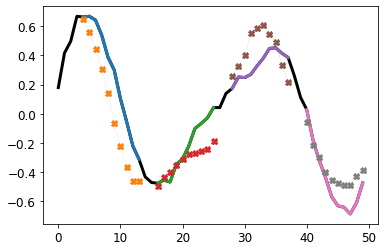

In [19]:
y_pred = model.predict(x_valid)
plot_next_time(0, x_valid, y_valid, y_pred)